📂 Por favor, sube tu archivo 'ComparaciónManual - copia.xlsx':


Saving granos_cosechados.xlsx to granos_cosechados.xlsx

✅ Datos cargados. Procesando 5 imágenes...

✅ Gráfico de 4 barras generado correctamente.


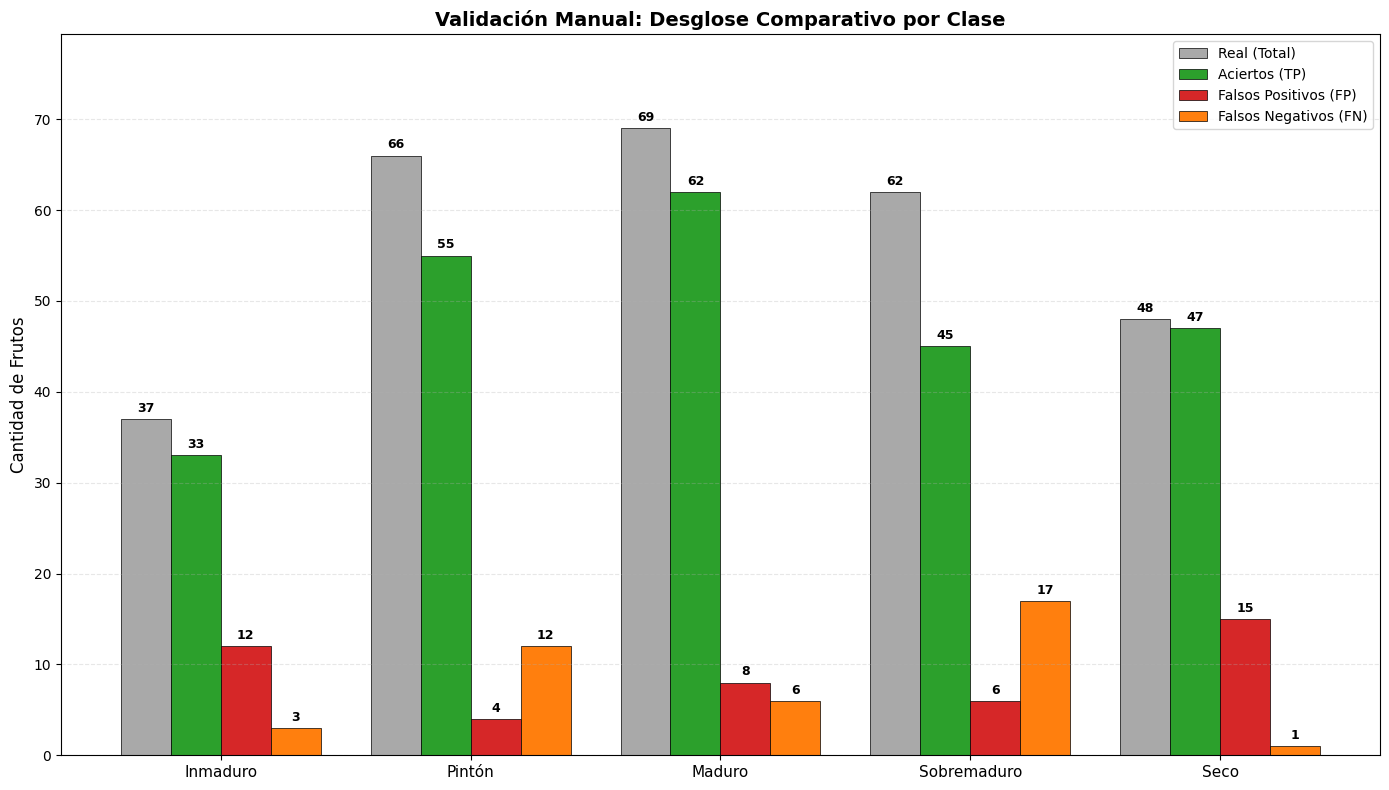

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patheffects as pe
from google.colab import files
import io

# --- 1. Subir el archivo ---
print("📂 Por favor, sube tu archivo 'ComparaciónManual - copia.xlsx':")
uploaded = files.upload()
if not uploaded:
    # Intentar usar el archivo en memoria si ya se subió antes
    try:
        filename = list(files.os.listdir('.'))[0] # Busca cualquier archivo
        if not filename.endswith(('.xlsx', '.csv')): raise Exception
    except:
        print("❌ No se subió archivo.")
else:
    filename = next(iter(uploaded))

# --- 2. Leer los datos ---
try:
    try:
        df = pd.read_excel(io.BytesIO(uploaded[filename]))
    except:
        if isinstance(uploaded[filename], bytes):
             df = pd.read_excel(io.BytesIO(uploaded[filename]))
        else:
             df = pd.read_excel(filename)
except:
    try:
        df = pd.read_csv(io.BytesIO(uploaded[filename]))
    except:
        df = pd.read_csv(filename)

print(f"\n✅ Datos cargados. Procesando {len(df)} imágenes...")

# --- 3. Calcular Métricas ---
classes = ['Inmaduro', 'Pintón', 'Maduro', 'Sobremaduro', 'Seco']
cols_real = ['V', 'P', 'M', 'So', 'Se']
cols_hits = ['VM', 'PM', 'MM', 'SoM', 'SeM']
cols_errs = ['VX', 'PX', 'MX', 'SoX', 'SeX'] # Falsos Positivos (FP)
cols_miss = ['VF', 'PF', 'MF', 'SoF', 'SeF'] # Falsos Negativos (FN)

real_total = []
hits = []
fp = []
fn = []

for i in range(5):
    r = df[cols_real[i]].fillna(0).sum()
    tp = df[cols_hits[i]].fillna(0).sum()
    err_x = df[cols_errs[i]].fillna(0).sum()
    miss = df[cols_miss[i]].fillna(0).sum()

    real_total.append(r)
    hits.append(tp)
    fp.append(err_x)
    fn.append(miss)

# --- 4. Generar Gráfico de 4 Barras ---
x = np.arange(len(classes))
width = 0.2 # Ancho de cada barra individual

fig, ax = plt.subplots(figsize=(14, 8))

# Posiciones de las barras
# Centramos el grupo en x[i]
pos1 = x - width * 1.5
pos2 = x - width * 0.5
pos3 = x + width * 0.5
pos4 = x + width * 1.5

# Crear barras
rects1 = ax.bar(pos1, real_total, width, label='Real (Total)', color='#A9A9A9', edgecolor='black', linewidth=0.5) # Gris
rects2 = ax.bar(pos2, hits, width, label='Aciertos (TP)', color='#2ca02c', edgecolor='black', linewidth=0.5)      # Verde
rects3 = ax.bar(pos3, fp, width, label='Falsos Positivos (FP)', color='#d62728', edgecolor='black', linewidth=0.5) # Rojo
rects4 = ax.bar(pos4, fn, width, label='Falsos Negativos (FN)', color='#ff7f0e', edgecolor='black', linewidth=0.5) # Naranja

# --- 5. Personalización ---
ax.set_ylabel('Cantidad de Frutos', fontsize=12)
ax.set_title('Validación Manual: Desglose Comparativo por Clase', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(classes, fontsize=11)
ax.legend(loc='upper right', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Función para poner números ARRIBA de las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            ax.annotate('{}'.format(int(height)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9, fontweight='bold')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Ajustar límite superior
max_val = max(max(real_total), max(hits), max(fp), max(fn))
ax.set_ylim(0, max_val * 1.15)

plt.tight_layout()
plt.savefig('grafico_validacion_4barras.png', dpi=300)
print("\n✅ Gráfico de 4 barras generado correctamente.")
plt.show()